In [15]:
import os
import sys
AbsPath = os.path.abspath("")
STEEL_Path = AbsPath+"/../.."
sys.path.append(AbsPath+"/../..")
import numpy as np
from itertools import cycle
import matplotlib.pyplot as plt

In [395]:
Data = np.load(STEEL_Path+"/Scripts/CentralPostprocessing/HaloMassTrackCE.npy")

In [396]:
GalaxyMassTrack10 = np.load(STEEL_Path+"/Scripts/CentralPostprocessing/GalaxyTracks9.9.npy")
Mask = np.ma.masked_inside(GalaxyMassTrack10[0], 0, 5).mask
GalaxyMass10 = np.log10(GalaxyMassTrack10[1][Mask])
Galaxy10SFR = np.log10(GalaxyMassTrack10[2] + GalaxyMassTrack10[3])[Mask]

GalaxyMassTrack11 = np.load(STEEL_Path+"/Scripts/CentralPostprocessing/GalaxyTracks11.0.npy")
Mask = np.ma.masked_inside(GalaxyMassTrack11[0], 0, 5).mask
GalaxyMass11 = np.log10(GalaxyMassTrack11[1][Mask])
Galaxy11SFR = np.log10(GalaxyMassTrack11[2] + GalaxyMassTrack11[3])[Mask]

GalaxyMassTrack11p5 = np.load(STEEL_Path+"/Scripts/CentralPostprocessing/GalaxyTracks11.5.npy")
Mask = np.ma.masked_inside(GalaxyMassTrack11p5[0], 0, 5).mask
GalaxyMass11p5 = np.log10(GalaxyMassTrack11p5[1][Mask])
Galaxy11p5SFR = np.log10(GalaxyMassTrack11p5[2] + GalaxyMassTrack11p5[3])[Mask]

GalaxyMassTrack12 = np.load(STEEL_Path+"/Scripts/CentralPostprocessing/GalaxyTracks12.0.npy")
Mask = np.ma.masked_inside(GalaxyMassTrack12[0], 0, 5).mask
GalaxyMass12 = np.log10(GalaxyMassTrack12[1][Mask])
Galaxy12SFR = np.log10(GalaxyMassTrack12[2] + GalaxyMassTrack12[3])[Mask]


def G19_SFR_DPL(M_out, z = 0.5):
    M_n = np.power(10, 10.7 + 0.35*z - 0.08*(z**2))
    Norm = 0.75 + 0.71*z - 0.086*(z**2)
    Alpha = 1.03 - 0.019*z + 0.007*(z**2)#
    Beta = 1.5 - 0.23*z - 0.045*(z**2)
    MperY = 2*(10**Norm)*np.power( np.power(np.divide(10**M_out, M_n), -Alpha) + np.power(np.divide(10**M_out, M_n), Beta), -1)
    return np.log10(MperY)

In [397]:
def G19_SFR_DPL(M_out, z = 0.5):
    M_n = np.power(10, 10.7 + 0.35*z - 0.08*(z**2))
    Norm = 0.75 + 0.71*z - 0.086*(z**2)
    Alpha = 1.03 - 0.019*z + 0.007*(z**2)#
    Beta = 1.5 - 0.23*z - 0.045*(z**2)
    MperY = 2*(10**Norm)*np.power( np.power(np.divide(10**M_out, M_n), -Alpha) + np.power(np.divide(10**M_out, M_n), Beta), -1)
    return np.log10(MperY)

/home/pg1g15/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log10
  


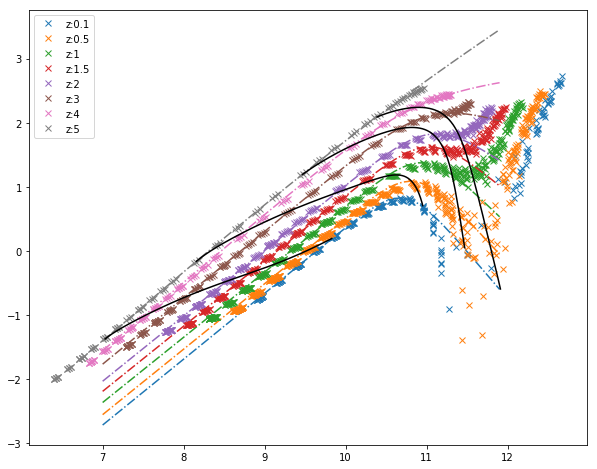

In [398]:
colours = ["C0", "C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8", "C9", "k"]
colourcycler = cycle(colours)
M = np.arange(7, 12, 0.1)
plt.figure(figsize = [10,8])
for Redshift in [0.1,0.5, 1,1.5, 2,3,4, 5]:
    colour = next(colourcycler)
    Mask = np.ma.masked_inside(Data[2], Redshift-0.1, Redshift+0.1).mask
    plt.plot(np.log10(Data[0][Mask]), np.log10(Data[1][Mask]), "x", label = "z:{}".format(Redshift), color = colour)
    plt.plot(M, G19_SFR_DPL(M, Redshift), "-.", color = colour)
plt.plot(GalaxyMass10, Galaxy10SFR, "-", color = "k")
plt.plot(GalaxyMass11, Galaxy11SFR, "-", color = "k")
plt.plot(GalaxyMass11p5, Galaxy11p5SFR, "-", color = "k")
plt.plot(GalaxyMass12, Galaxy12SFR, "-", color = "k")
plt.legend()
plt.show()

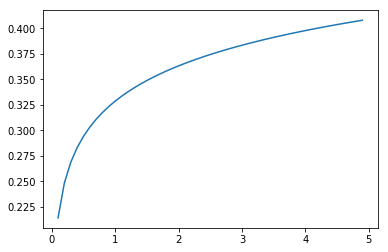

In [136]:
T = np.arange(0.1, 5, 0.1)
plt.plot(T, 0.05*np.log(1+np.divide((T*(10**3)), 1.4)))

In [153]:
np.flip(np.cumsum(np.flip(np.arange(0.1, 1, 0.1)[:5])))

array([1.5, 1.4, 1.2, 0.9, 0.5])

In [151]:
np.cumsum(np.arange(1, 10, 1)[:5])

array([ 1,  3,  6, 10, 15])